'#converting multiclass labels present in our datasets to binary class labels\nfor i , row in data_TrainNews.iterrows():\n    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):\n        data_TrainNews.iloc[:,0] = "true"\n    else :\n        data_TrainNews.iloc[:,0] = "false"\n        \nfor i,row in data_TrainNews.iterrows():\n    print(row)\n'

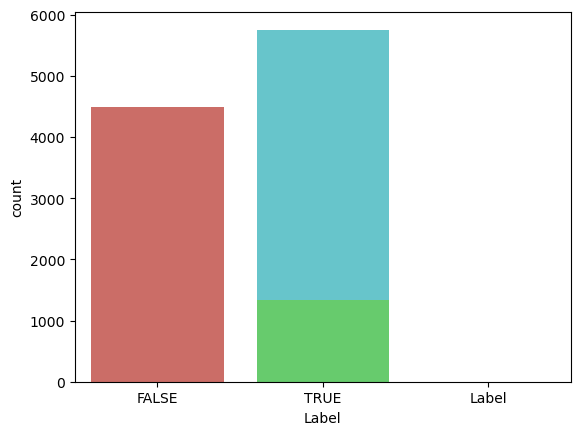

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov  4 12:00:49 2017

@author: NishitP
"""
#import os
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

#before reading the files, setup the working directory to point to project repo
#reading data files 


test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)



#data observation
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))

#check the data by calling below function
#data_obs()

#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sb.countplot(x='Label', data=dataFile, palette='hls')
    

#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)


#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()

#run the below function call to see the quality check results
#data_qualityCheck()



#eng_stemmer = SnowballStemmer('english')
#stopwords = set(nltk.corpus.stopwords.words('english'))

#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed


#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

"""
#trigrams
def create_trigrams(words):
    assert type(words) == list
    skip == 0
    join_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,skip+2):
            for k1 in range(1, skip+2):
                for k2 in range(1,skip+2):
                    for i+k1 < Len and i+k1+k2 < Len:
                        lst.append(join_str.join([words[i], words[i+k1],words[i+k1+k2])])
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst
"""


porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

#doc = ['runners like running and thus they run','this is a test for tokens']
#tokenizer([word for line in test_news.iloc[:,1] for word in line.lower().split()])

#show the distribution of labels in the train and test data
"""def create_datafile(filename)
    #function to slice the dataframe to keep variables necessary to be used for classification
    return "return df to be used"
"""
    
"""#converting multiclass labels present in our datasets to binary class labels
for i , row in data_TrainNews.iterrows():
    if (data_TrainNews.iloc[:,0] == "mostly-true" | data_TrainNews.iloc[:,0] == "half-true" | data_TrainNews.iloc[:,0] == "true"):
        data_TrainNews.iloc[:,0] = "true"
    else :
        data_TrainNews.iloc[:,0] = "false"
        
for i,row in data_TrainNews.iterrows():
    print(row)
"""

In [17]:
import pickle

#doc_new = ['obama is running for president in 2016']

var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))


#function to run for prediction
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))


if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify:  president obbama


You entered: president obbama


C:\Users\gnane\AppData\Local\Temp\ipykernel_19124\3588638614.py:12: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  load_model = pickle.load(open('final_model.sav', 'rb'))
C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 0.18.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 0.18.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#secu

ModuleNotFoundError: No module named 'sklearn.linear_model.logistic'

In [19]:
from flask import Flask, render_template, request
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

app = Flask(__name__,template_folder='./templates',static_folder='./static')

loaded_model = pickle.load(open('model.pkl', 'rb'))
lemmatizer = WordNetLemmatizer()
stpwrds = set(stopwords.words('english'))
tfidf_v = TfidfVectorizer()
corpus = []

def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

@app.route('/')
def home():
    return render_template('index.html')



@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        message = request.form['news']
        pred = fake_news_det(message)
        print(pred)
        return render_template('index.html', prediction=pred)
    else:
        return render_template('index.html', prediction="Something went wrong")



if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\gnane\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
